# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [3]:
env = gym.make('BipedalWalker-v3')
env.seed(10)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
print(env.action_space.shape[0])

4


/home/xiaozhu/anaconda3/envs/drlnd/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

/home/xiaozhu/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: -112.04	Score: -130.81
Episode 200	Average Score: -60.69	Score: -33.2033
Episode 300	Average Score: -52.26	Score: -23.250
Episode 400	Average Score: -92.76	Score: -116.31
Episode 500	Average Score: -114.66	Score: -113.28
Episode 600	Average Score: -55.30	Score: -35.7765
Episode 700	Average Score: -47.44	Score: -30.186
Episode 800	Average Score: -48.62	Score: -30.470
Episode 900	Average Score: -66.72	Score: -35.673
Episode 1000	Average Score: -30.13	Score: -34.24
Episode 1100	Average Score: -27.17	Score: -30.24
Episode 1200	Average Score: -47.29	Score: -122.04
Episode 1300	Average Score: -39.63	Score: -22.334
Episode 1400	Average Score: -23.37	Score: -23.30
Episode 1500	Average Score: -36.79	Score: -114.28
Episode 1600	Average Score: -23.58	Score: -16.510
Episode 1700	Average Score: -19.78	Score: -17.59
Episode 1800	Average Score: -19.78	Score: -14.24
Episode 1900	Average Score: -16.44	Score: -19.85
Episode 2000	Average Score: -17.45	Score: -14.09
Episode 2100

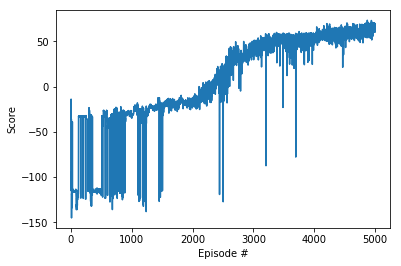

In [3]:
def ddpg(n_episodes=5000, max_t=300):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

It is weird.

In [14]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
import time

state = env.reset()
agent.reset()
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    print(action)
    if done:
        break
        
env.close()

[0.9982393  0.42679435 1.         1.        ]
[ 0.99995303 -0.99999994  1.          1.        ]
[-0.99999994 -0.9999828   1.          1.        ]
[-1.         0.3754326  1.         1.       ]
[-0.9999011  0.9997479  1.         1.       ]
[0.4548603 0.9930707 1.        1.       ]
[-0.30124006  0.95828354  1.          1.        ]
[ 0.10049608 -0.30989102  1.          1.        ]
[ 0.5222589  -0.87209433  1.          1.        ]
[-0.17139116 -0.9382737   1.          1.        ]
[ 0.37025437 -0.91154695  1.          1.        ]
[ 0.25119984 -0.94527006  1.          1.        ]
[ 0.19369179 -0.9192575   1.          1.        ]
[-0.07712211 -0.8460543   1.          1.        ]
[ 0.04989906 -0.5483084   1.          1.        ]
[ 0.379595  -0.2615467  1.         1.       ]
[ 0.18276413 -0.28906545  1.          1.        ]
[-0.01289254  0.9924687   1.          1.        ]
[-0.0311452  0.6088181  1.         1.       ]
[-0.25256574  0.67992866  1.          1.        ]
[-0.37799105  0.81535333  1.

[ 0.8380204 -0.9269364  1.         1.       ]
[0.75398034 0.13454066 1.         1.        ]
[ 0.61692625 -0.29812017  1.          1.        ]
[0.8287047  0.17901546 1.         1.        ]
[ 0.66636294 -0.32131025  1.          1.        ]
[ 0.6709563  -0.09064787  1.          1.        ]
[0.67216676 0.17174532 1.         1.        ]
[0.04876433 0.5051973  1.         1.        ]
[-0.7341643  -0.05019098  1.          1.        ]
[-0.9794666   0.99792063  1.          1.        ]
[-0.99066013  0.99927163  1.          1.        ]
[-0.9441298  0.9991246  1.         1.       ]
[-0.3571934  0.9980107  1.         1.       ]
[0.10608135 0.9995245  1.         1.        ]
[0.3413331  0.99988496 1.         1.        ]
[0.19287129 0.9999698  1.         1.        ]
[0.13429461 0.9999579  1.         1.        ]
[0.20584092 0.99919873 1.         1.        ]
[0.79220396 0.7314043  1.         1.        ]
[ 0.7625061  -0.40450296  1.          1.        ]
[ 0.91784567 -0.91916823  1.          1.        ]
[0

[-0.26617253  0.99999994  1.          1.        ]
[-0.1548812   0.99999946  1.          1.        ]
[-0.14392401  0.99999243  1.          1.        ]
[-3.7079302e-04  9.9977195e-01  1.0000000e+00  1.0000000e+00]
[0.2924605 0.9485885 1.        1.       ]
[ 0.9572231  -0.99942243  1.          1.        ]
[ 0.93955904 -0.99986464  1.          1.        ]
[ 0.5915707 -0.5937935  1.         1.       ]
[ 0.6734239 -0.3534771  1.         1.       ]
[ 0.8098305 -0.1902789  1.         1.       ]
[0.26279563 0.11015422 1.         1.        ]
[-0.10734895  0.6996282   1.          1.        ]
[-0.8187701   0.99992806  1.          1.        ]
[-0.3609668  0.9999866  1.         1.       ]
[-0.2829249  0.9991947  1.         1.       ]
[-0.11140315  0.8908106   1.          1.        ]
[ 0.93829167 -0.99993235  1.          1.        ]
[ 0.8427568  -0.99991006  1.          1.        ]
[ 0.40467873 -0.76553726  1.          1.        ]
[ 0.53891367 -0.9438734   1.          1.        ]
[ 0.73547333 -0.9378

[-0.21318206  0.48609802  1.          1.        ]
[ 0.55382156 -0.98626685  1.          1.        ]
[ 0.9639305 -0.9999349  1.         1.       ]
[ 0.555566  -0.6936383  1.         1.       ]
[ 0.53885955 -0.32775363  1.          1.        ]
[ 0.69665366 -0.08404085  1.          1.        ]
[ 0.8842113  -0.19082172  1.          1.        ]
[0.39595595 0.14362141 1.         1.        ]
[-0.0547138 -0.9205599  1.         1.       ]
[0.8169552 0.1875684 1.        1.       ]
[ 0.20709176 -0.10598316  1.          1.        ]
[-0.55781245 -0.12410119  1.          1.        ]
[-0.5240623  0.8061679  1.         1.       ]
[-0.9966513   0.99989283  1.          1.        ]
[-0.95834816  0.99999976  1.          1.        ]
[-0.42494318  0.9999989   1.          1.        ]
[-0.3754883   0.99999917  1.          1.        ]
[-0.38919103  0.9999993   1.          1.        ]
[-0.38219726  0.99999845  1.          1.        ]
[-0.29866782  0.9999899   1.          1.        ]
[-0.09010764  0.9997927   1.

[ 0.9535202 -0.7582558  1.         1.       ]
[ 0.8042359  -0.44323006  1.          1.        ]
[ 0.42253307 -0.4888293   1.          1.        ]
[0.21279064 0.12491579 1.         1.        ]
[-0.99812686  0.99759364  1.          1.        ]
[-0.95039225  0.9999999   1.          1.        ]
[-0.41280192  0.9999978   1.          1.        ]
[-0.01679089  0.9999254   1.          1.        ]
[0.08136728 0.99785507 1.         1.        ]
[0.29705265 0.85389113 1.         1.        ]
[ 0.78932804 -0.98384696  1.          1.        ]
[ 0.94611186 -0.9997711   1.          1.        ]
[ 0.5908247  -0.64872247  1.          1.        ]
[ 0.7197812  -0.49699572  1.          1.        ]
[ 0.3513484  -0.51849324  1.          1.        ]
[0.10356385 0.13378279 1.         1.        ]
[-0.9846153  0.635858   1.         1.       ]
[-0.8360994  0.9999932  1.         1.       ]
[-0.4329955  0.9998834  1.         1.       ]
[-0.2148884   0.99450135  1.          1.        ]
[0.03721551 0.5819284  1.       

[0.23068655 0.19080897 1.         1.        ]
[-0.97848105  0.9888385   1.          1.        ]
[-0.8164265  0.9999997  1.         1.       ]
[-0.3289291  0.9999934  1.         1.       ]
[-0.14347419  0.9997044   1.          1.        ]
[0.05396971 0.9820989  1.         1.        ]
[ 0.87190145 -0.9919295   1.          1.        ]
[ 0.9342523  -0.99981016  1.          1.        ]
[ 0.6099641  -0.68181473  1.          1.        ]
[ 0.7277788 -0.4319768  1.         1.       ]
[ 0.73340374 -0.98705626  1.          1.        ]
[ 0.910944  -0.9468339  1.         1.       ]
[ 0.312824  -0.8800882  1.         1.       ]
[-0.99659383  0.9076561   1.          1.        ]
[-0.80629647  0.9999986   1.          1.        ]
[-0.19256723  0.99999905  1.          1.        ]
[-0.07662144  0.999991    1.          1.        ]
[0.00624453 0.99977106 1.         1.        ]
[0.27348882 0.97132695 1.         1.        ]
[ 0.91787565 -0.9923248   1.          1.        ]
[ 0.9423453 -0.9997938  1.         1

[ 0.8410373 -0.6217898  1.         1.       ]
[ 0.88840616 -0.69984156  1.          1.        ]
[ 0.7693605 -0.9468682  1.         1.       ]
[-0.43956456  0.9152243   1.          1.        ]
[-0.23539346  0.9999999   1.          1.        ]
[-0.12153657  0.9999969   1.          1.        ]
[6.0654426e-04 9.9941576e-01 1.0000000e+00 1.0000000e+00]
[ 0.9846272  -0.99888057  1.          1.        ]
[ 0.97499156 -0.9997556   1.          1.        ]
[ 0.7121259  -0.32052174  1.          1.        ]
[ 0.87390983 -0.59434307  1.          1.        ]
[ 0.707162  -0.9771857  1.         1.       ]
[ 0.75799614 -0.96491563  1.          1.        ]
[-0.95324403  0.9672358   1.          1.        ]
[-0.2897099  0.9999818  1.         1.       ]
[-0.13862965  0.9999985   1.          1.        ]
[-0.03811472  0.99994296  1.          1.        ]
[0.3871319  0.89177006 1.         1.        ]
[ 0.9561717  -0.99932003  1.          1.        ]
[ 0.93501216 -0.99981517  1.          1.        ]
[ 0.70486766